In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

df = pd.read_csv('Social_Network_Ads.csv')

df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']


In [5]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))


print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8875

Confusion Matrix:
 [[50  2]
 [ 7 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[50  2]
 [ 7 21]]


In [9]:
TN, FP, FN, TP = cm.ravel()

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


True Positives (TP): 21
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 7


In [10]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = 1 - accuracy

print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")


Accuracy: 0.8875
Error Rate: 0.1125


In [11]:
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.9130
Recall: 0.7500


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


X_2d = df[['Age', 'EstimatedSalary']]
y = df['Purchased']


scaler_2d = StandardScaler()
X_scaled_2d = scaler_2d.fit_transform(X_2d)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_2d, y, test_size=0.2, random_state=42
)


model_2d = LogisticRegression()
model_2d.fit(X_train, y_train)


y_pred = model_2d.predict(X_test)


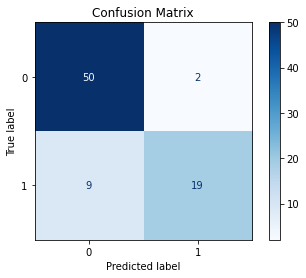

In [13]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_2d.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [14]:
def plot_decision_boundary(X, y, model, title):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=50)
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Purchased")
    plt.show()


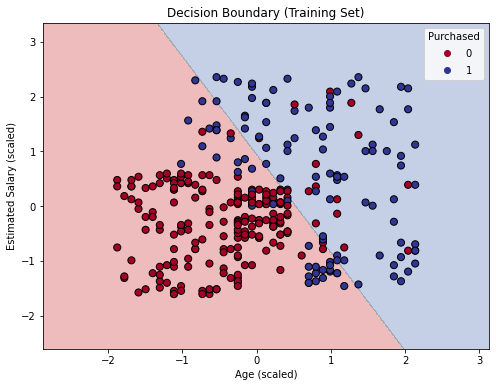

In [15]:
plot_decision_boundary(X_train, y_train.to_numpy(), model_2d, "Decision Boundary (Training Set)")


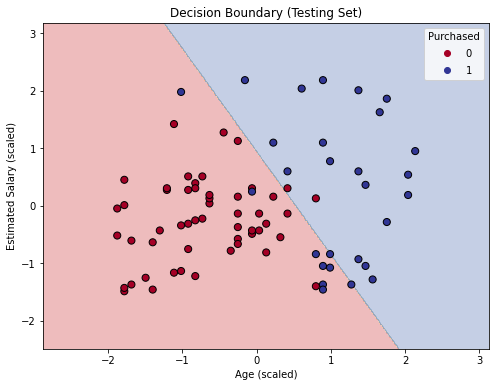

In [16]:
plot_decision_boundary(X_test, y_test.to_numpy(), model_2d, "Decision Boundary (Testing Set)")
